<center><h1>MINERIA DE DATOS</h1>
<strong>Taller de Clasificación</strong><br />
PROFESORA ELIZABETH LEON GUZMAN <br />
<strong>TEMA</strong> Clasificación y Validación<br />
<strong>María Camila Preciado Rojas</strong><br /></center>



# 1).BAYES

***1) Crear un modelo usando Naive Bayes a un conjunto de datos categórico.***

a) Realizar una partición del conjunto de datos, usando muestreo estratificado: 70 % para entrenamiento y 30 % para test.

b) Entrenar el modelo <br />
c) Aplicar el modelo al conjunto de test <br />
d) Medir el desempeño del modelo calculando Matriz de confusión, Exactitud (Accuracy), Error de 
clasificación, Precisión (Precision), Índice de Recuperación (Recall), Medida F1


In [ ]:
import pandas as pd

In [ ]:
pd_car = pd.read_csv('car.csv',  names=['buying','maint','doors','persons','lug_boot','safety','Clase'])
X = pd_car.values
y = pd_car['Clase']

pd_car


,buying,maint,doors,persons,lug_boot,safety,Clase
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


#### **a**. partición del conjunto de datos, usando muestreo estratificado: 70 % para entrenamiento y 30 % para test.

In [ ]:
# Import LabelEncoder
from sklearn import preprocessing
import numpy as np

from sklearn.model_selection import train_test_split

le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
buying_encoded=le.fit_transform(pd_car['buying'])
maint_encoded = le.fit_transform(pd_car['maint'])
doors_encoded = le.fit_transform(pd_car['doors'])
persons_encoded = le.fit_transform(pd_car['persons'])
lug_boot_encoded = le.fit_transform(pd_car['lug_boot'])
safety_encoded = le.fit_transform(pd_car['safety'])
label = le.fit_transform(pd_car['Clase'])

# Combining all dimensions of the dataset
features = list(zip(buying_encoded, maint_encoded, doors_encoded, persons_encoded,lug_boot_encoded,safety_encoded))

print(features)

#Se parten los datos para usar 70 Entrenamiento y 30 test:
X_train_car, X_test_car, y_train_car, y_test_car = train_test_split(features, label,test_size=.3)

[(3, 3, 0, 0, 2, 1), (3, 3, 0, 0, 2, 2), (3, 3, 0, 0, 2, 0), (3, 3, 0, 0, 1, 1), (3, 3, 0, 0, 1, 2), (3, 3, 0, 0, 1, 0), (3, 3, 0, 0, 0, 1), (3, 3, 0, 0, 0, 2), (3, 3, 0, 0, 0, 0), (3, 3, 0, 1, 2, 1), (3, 3, 0, 1, 2, 2), (3, 3, 0, 1, 2, 0), (3, 3, 0, 1, 1, 1), (3, 3, 0, 1, 1, 2), (3, 3, 0, 1, 1, 0), (3, 3, 0, 1, 0, 1), (3, 3, 0, 1, 0, 2), (3, 3, 0, 1, 0, 0), (3, 3, 0, 2, 2, 1), (3, 3, 0, 2, 2, 2), (3, 3, 0, 2, 2, 0), (3, 3, 0, 2, 1, 1), (3, 3, 0, 2, 1, 2), (3, 3, 0, 2, 1, 0), (3, 3, 0, 2, 0, 1), (3, 3, 0, 2, 0, 2), (3, 3, 0, 2, 0, 0), (3, 3, 1, 0, 2, 1), (3, 3, 1, 0, 2, 2), (3, 3, 1, 0, 2, 0), (3, 3, 1, 0, 1, 1), (3, 3, 1, 0, 1, 2), (3, 3, 1, 0, 1, 0), (3, 3, 1, 0, 0, 1), (3, 3, 1, 0, 0, 2), (3, 3, 1, 0, 0, 0), (3, 3, 1, 1, 2, 1), (3, 3, 1, 1, 2, 2), (3, 3, 1, 1, 2, 0), (3, 3, 1, 1, 1, 1), (3, 3, 1, 1, 1, 2), (3, 3, 1, 1, 1, 0), (3, 3, 1, 1, 0, 1), (3, 3, 1, 1, 0, 2), (3, 3, 1, 1, 0, 0), (3, 3, 1, 2, 2, 1), (3, 3, 1, 2, 2, 2), (3, 3, 1, 2, 2, 0), (3, 3, 1, 2, 1, 1), (3, 3, 1, 2, 1, 2),

####  **b)** Entrenar el modelo

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import CategoricalNB
# De sklearn.naive_bayes importar GaussianNB, BernoulliNB, MultinomialNB  de acuerdo a los tipos de datos


#Create a Gaussian Classifier
model = CategoricalNB()
model.fit(X_train_car, y_train_car)

#Predicted output:
predicted = model.predict([[3,3,1,0,1,1]])
print(predicted)

[2]


#### **c)** Aplicar el modelo al conjunto de test

---



In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, classification_report

y_pred_car = model.predict(X_test_car)


#### **d)** Medir el desempeño del modelo calculando Matriz de confusión, Exactitud (Accuracy), Error de clasificación, Precisión (Precision), Índice de Recuperación (Recall), Medida F1

Se imprime la matriz de Confusión


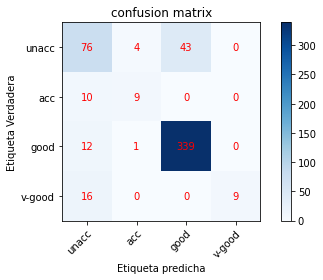

Imprimiendo el análisis de los resultados accuracy, precision, recall, f1: 
[[ 76   4  43   0]
 [ 10   9   0   0]
 [ 12   1 339   0]
 [ 16   0   0   9]]
              precision    recall  f1-score   support

           0       0.67      0.62      0.64       123
           1       0.64      0.47      0.55        19
           2       0.89      0.96      0.92       352
           3       1.00      0.36      0.53        25

    accuracy                           0.83       519
   macro avg       0.80      0.60      0.66       519
weighted avg       0.83      0.83      0.82       519



In [ ]:
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

#Se Define la función para dibujar la matriz de confusión:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False, cmap=plt.cm.Blues):

    title = 'confusion matrix'
    cm = confusion_matrix(y_true, y_pred)
    #classes = classes[unique_labels(y_true, y_pred)]
    
    #Matriz de Consufión calculada:
    print("Se imprime la matriz de Confusión")

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Etiqueta Verdadera',
           xlabel='Etiqueta predicha')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="red" if cm[i, j] > thresh else "red")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)
y_test_car = list(map(int, y_test_car))
y_pred_car = list(map(int, y_pred_car))

class_names = ['unacc', 'acc','good','v-good']
cm = confusion_matrix(y_test_car, y_pred_car)

plot_confusion_matrix(y_test_car, y_pred_car, classes=class_names)
plt.show()

print("Imprimiendo el análisis de los resultados accuracy, precision, recall, f1: ")

print(cm)
# Print the precision and recall, among other metrics
print(classification_report(y_test_car, y_pred_car, digits=2))


 **2). Crear un modelo usando Naive Bayes al conjunto de datos de IRIS.**

In [146]:
pd_iris = pd.read_csv('iris.csv',  names=['LargoSep','AnchoSep','LargoPet','AnchoPet','ClaseF'])
X = pd_iris.values
y = pd_iris['ClaseF']

pd_iris


,LargoSep,AnchoSep,LargoPet,AnchoPet,ClaseF
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#### **a)**. Realizar una partición del conjunto de datos, usando muestreo estratificado: 70 % para entrenamiento y 30 % para test.

In [147]:
# Import LabelEncoder
from sklearn import preprocessing
import numpy as np

from sklearn.model_selection import train_test_split

le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
LargoSep_encoded=le.fit_transform(pd_iris['LargoSep'])
AnchoSep_encoded = le.fit_transform(pd_iris['AnchoSep'])
LargoPet_encoded = le.fit_transform(pd_iris['LargoPet'])
AnchoPet_encoded = le.fit_transform(pd_iris['AnchoPet'])
labelF = le.fit_transform(pd_iris['ClaseF'])

# Combining all dimensions of the dataset
features = list(zip(LargoSep_encoded, AnchoSep_encoded, LargoPet_encoded, AnchoPet_encoded))

print(features)

#Se parten los datos para usar 70 Entrenamiento y 30 test:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(features, labelF,test_size=.3)


[(8, 14, 4, 1), (6, 9, 4, 1), (4, 11, 3, 1), (3, 10, 5, 1), (7, 15, 4, 1), (11, 18, 7, 3), (3, 13, 4, 2), (7, 13, 5, 1), (1, 8, 4, 1), (6, 10, 5, 0), (11, 16, 5, 1), (5, 13, 6, 1), (5, 9, 4, 0), (0, 9, 1, 0), (15, 19, 2, 1), (14, 22, 5, 3), (11, 18, 3, 3), (8, 14, 4, 2), (14, 17, 7, 2), (8, 17, 5, 2), (11, 13, 7, 1), (8, 16, 5, 3), (3, 15, 0, 1), (8, 12, 7, 4), (5, 13, 8, 1), (7, 9, 6, 1), (7, 13, 6, 3), (9, 14, 5, 1), (9, 13, 4, 1), (4, 11, 6, 1), (5, 10, 6, 1), (11, 13, 5, 3), (9, 20, 5, 0), (12, 21, 4, 1), (6, 10, 5, 0), (7, 11, 2, 1), (12, 14, 3, 1), (6, 10, 5, 0), (1, 9, 3, 1), (8, 13, 5, 1), (7, 14, 3, 2), (2, 2, 3, 2), (1, 11, 3, 1), (7, 14, 6, 5), (8, 17, 8, 3), (5, 9, 4, 2), (8, 17, 6, 1), (3, 11, 4, 1), (10, 16, 5, 1), (7, 12, 4, 1), (27, 11, 23, 10), (21, 11, 21, 11), (26, 10, 25, 11), (12, 2, 16, 9), (22, 7, 22, 11), (14, 7, 21, 9), (20, 12, 23, 12), (6, 3, 10, 6), (23, 8, 22, 9), (9, 6, 15, 10), (7, 0, 11, 6), (16, 9, 18, 11), (17, 1, 16, 6), (18, 8, 23, 10), (13, 8, 12, 9

####  **b)** Entrenar el modelo

In [148]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
# De sklearn.naive_bayes importar GaussianNB, BernoulliNB, MultinomialNB  de acuerdo a los tipos de datos


#Create a Gaussian Classifier
model = MultinomialNB()
model.fit(X_train_iris, y_train_iris)

#Predicted output:
predicted = model.predict([[1,0,0,1]])
print(predicted)

[2]


#### **c)** Aplicar el modelo al conjunto de test

In [150]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, classification_report

y_pred_iris = model.predict(X_test_iris)


#### **d)** Medir el desempeño del modelo calculando Matriz de confusión, Exactitud (Accuracy), Error de clasificación, Precisión (Precision), Índice de Recuperación (Recall), Medida F1

Se imprime la matriz de Confusión


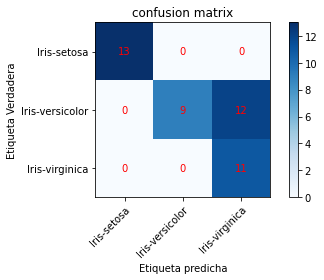

Imprimiendo el análisis de los resultados accuracy, precision, recall, f1: 
[[13  0  0]
 [ 0  9 12]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.43      0.60        21
           2       0.48      1.00      0.65        11

    accuracy                           0.73        45
   macro avg       0.83      0.81      0.75        45
weighted avg       0.87      0.73      0.73        45



In [151]:
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

#Se Define la función para dibujar la matriz de confusión:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False, cmap=plt.cm.Blues):

    title = 'confusion matrix'
    cm = confusion_matrix(y_true, y_pred)
    #classes = classes[unique_labels(y_true, y_pred)]
    
    #Matriz de Consufión calculada:
    print("Se imprime la matriz de Confusión")

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Etiqueta Verdadera',
           xlabel='Etiqueta predicha')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="red" if cm[i, j] > thresh else "red")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)
y_test_iris = list(map(int, y_test_iris))
y_pred_iris = list(map(int, y_pred_iris))

class_names = ['Iris-setosa', 'Iris-versicolor','Iris-virginica']
cm = confusion_matrix(y_test_iris, y_pred_iris)

plot_confusion_matrix(y_test_iris, y_pred_iris, classes=class_names)
plt.show()

print("Imprimiendo el análisis de los resultados accuracy, precision, recall, f1: ")

print(cm)
# Print the precision and recall, among other metrics
print(classification_report(y_test_iris, y_pred_iris, digits=2))

**3.)** ¿Qué diferencias tienen los modelos Naive Bayes en cuanto al tipo de dato que manejan (discreto y continuo)?

***Se puede decir que no existe un modelo "CORRECTO". Sin embargo, dado que, en los dos modelos se utilizó la codificación one-hot, ahora básicamente se trata de funciones booleanas.***

#***2). ARBOL DE DECISIÓN***

**1)** Descargar el conjunto de datos nba.txt . Leer la descripción del conjunto de datos en la cabecera
del archivo.

In [41]:
import pandas as pd

data = pd.read_csv('nba.csv',header='infer', sep=';')
data

,G,GS,MPG,FG%,3p%,FT%,OFF,DEF,RPG,APG,SPG,BPG,TO,PF,PPG,Class
0,362,223,244,466,405,800,6,21,27,15,5,3,8,20,88,1
1,19,0,119,273,298,970,1,11,12,12,4,0,12,14,46,1
2,1148,1140,369,452,400,894,10,32,42,36,12,2,22,23,200,1
3,466,170,198,482,284,745,9,19,28,13,12,4,14,22,78,1
4,38,1,95,381,292,743,3,9,12,3,3,1,5,11,31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,14,0,120,414,0,478,9,19,28,2,5,4,11,16,25,2
304,19,0,58,444,0,417,8,12,21,0,2,8,3,7,15,2
305,43,5,147,507,0,652,15,21,36,3,5,4,5,14,46,2
306,137,29,144,511,0,624,13,21,34,3,3,12,9,24,42,2


In [44]:
data['Class'] = data['Class'].replace(['1','2'],'1')
data

,G,GS,MPG,FG%,3p%,FT%,OFF,DEF,RPG,APG,SPG,BPG,TO,PF,PPG,Class
0,362,223,244,466,405,800,6,21,27,15,5,3,8,20,88,1
1,19,0,119,273,298,970,1,11,12,12,4,0,12,14,46,1
2,1148,1140,369,452,400,894,10,32,42,36,12,2,22,23,200,1
3,466,170,198,482,284,745,9,19,28,13,12,4,14,22,78,1
4,38,1,95,381,292,743,3,9,12,3,3,1,5,11,31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,14,0,120,414,0,478,9,19,28,2,5,4,11,16,25,2
304,19,0,58,444,0,417,8,12,21,0,2,8,3,7,15,2
305,43,5,147,507,0,652,15,21,36,3,5,4,5,14,46,2
306,137,29,144,511,0,624,13,21,34,3,3,12,9,24,42,2


**a) - d)**

In [57]:
#a) Realizar una partición del conjunto de datos, usando muestreo estratificado: 70 % para entrenamiento y 30 % para test
from sklearn import tree

YNBA = data['Class']
XNBA = data.drop(['Class'],axis=1)
X_trainNBA, X_testNBA, y_trainNBA, y_testNBA = train_test_split(XNBA, YNBA, test_size=.3,
                                                    random_state=0)

In [99]:
#b)Entrenar el modelo
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = clf.fit(X_trainNBA, y_trainNBA)


In [59]:
#c)aplicar el modelo
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, classification_report
y_pred_nba = clf.predict(X_testNBA)


Se imprime la matriz de Confusión


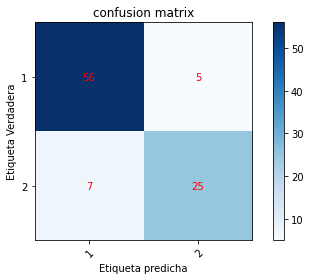

Imprimiendo el análisis de los resultados accuracy, precision, recall, f1: 
[[56  5]
 [ 7 25]]
              precision    recall  f1-score   support

           1       0.89      0.92      0.90        61
           2       0.83      0.78      0.81        32

    accuracy                           0.87        93
   macro avg       0.86      0.85      0.85        93
weighted avg       0.87      0.87      0.87        93



In [67]:
#d) Medir el desempeño del modelo calculando Matriz de confusión, Exactitud (Accuracy), Error de clasificación, Precisión (Precision), Índice de Recuperación (Recall), Medida F1
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

#Se Define la función para dibujar la matriz de confusión:
def plot_confusion_matrix(y_true, y_pred_nba, classes,
                          normalize=False, cmap=plt.cm.Blues):

    title = 'confusion matrix'
    cm = confusion_matrix(y_true, y_pred_nba)
    #classes = classes[unique_labels(y_true, y_pred)]
    
    #Matriz de Consufión calculada:
    print("Se imprime la matriz de Confusión")

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Etiqueta Verdadera',
           xlabel='Etiqueta predicha')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="red" if cm[i, j] > thresh else "red")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)
y_testNBA = list(map(int, y_testNBA))
y_pred_nba = list(map(int, y_pred_nba))

class_names = ['1', '2']
cm = confusion_matrix(y_testNBA, y_pred_nba)

plot_confusion_matrix(y_testNBA, y_pred_nba, classes=class_names)
plt.show()

print("Imprimiendo el análisis de los resultados accuracy, precision, recall, f1: ")

print(cm)
# Print the precision and recall, among other metrics
print(classification_report(y_testNBAn, y_pred_nba, digits=2))

**e)**Grafique la curva ROC


In [261]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
rf = RandomForestClassifier(max_features=5, n_estimators=500)
rf.fit(X_trainNBA, y_trainNBA)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [262]:
nb = GaussianNB()
nb.fit(X_trainNBA, y_trainNBA)

GaussianNB(priors=None, var_smoothing=1e-09)

In [270]:
r_probsNAB = [0 for _ in range(len(y_testNBA))]
rf_probs = rf.predict_proba(X_testNBA)
nb_probs = nb.predict_proba(X_testNBA)

In [271]:
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]

In [272]:
from sklearn.metrics import roc_curve, roc_auc_score

In [273]:
r_auc = roc_auc_score(y_testNBA, r_probsNAB)
rf_auc = roc_auc_score(y_testNBA, rf_probs)
nb_auc = roc_auc_score(y_testNBA, nb_probs)

In [274]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.982
Naive Bayes: AUROC = 0.960


**4)** Modifique el modelo anterior para que también calcule el desempeño en el conjunto de entrenamiento.


Se imprime la matriz de Confusión


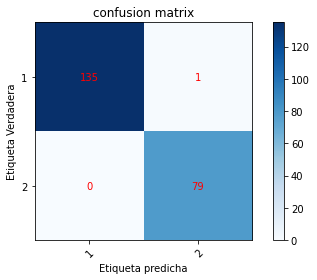

Imprimiendo el análisis de los resultados accuracy, precision, recall, f1: 
[[135   1]
 [  0  79]]
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       136
           2       0.99      1.00      0.99        79

    accuracy                           1.00       215
   macro avg       0.99      1.00      1.00       215
weighted avg       1.00      1.00      1.00       215



In [102]:
#A) aplicar el modelo
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, classification_report
y_pred_nbatrain = clf.predict(X_trainNBA)

# Medir el desempeño del modelo calculando Matriz de confusión, Exactitud (Accuracy), Error de clasificación, Precisión (Precision), Índice de Recuperación (Recall), Medida F1
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

#Se Define la función para dibujar la matriz de confusión:
def plot_confusion_matrix(y_true, y_pred_nba, classes,
                          normalize=False, cmap=plt.cm.Blues):

    title = 'confusion matrix'
    cm = confusion_matrix(y_true, y_pred_nba)
    #classes = classes[unique_labels(y_true, y_pred)]
    
    #Matriz de Consufión calculada:
    print("Se imprime la matriz de Confusión")

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Etiqueta Verdadera',
           xlabel='Etiqueta predicha')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="red" if cm[i, j] > thresh else "red")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)
y_trainNBA = list(map(int, y_trainNBA))
y_pred_nbatrain = list(map(int, y_pred_nbatrain))

class_names = ['1', '2']
cm = confusion_matrix(y_trainNBA, y_pred_nbatrain)

plot_confusion_matrix(y_trainNBA, y_pred_nbatrain, classes=class_names)
plt.show()

print("Imprimiendo el análisis de los resultados accuracy, precision, recall, f1: ")

print(cm)
# Print the precision and recall, among other metrics
print(classification_report(y_trainNBA, y_pred_nbatrain, digits=2))

**b )**Haga diferentes pruebas cambiando la profundidad máxima del árbol. Pruebe los valores
1,2,...,10.

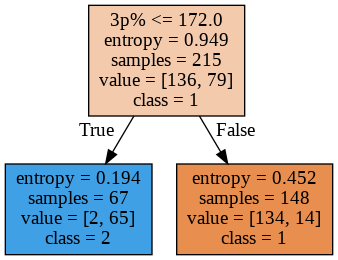

In [105]:
#Profundidad 1
import pydotplus 
from IPython.display import Image

clf1 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=1)
clf1 = clf1.fit(X_trainNBA, y_trainNBA)


dot_data = tree.export_graphviz(clf1, feature_names=X.columns, class_names=['1','2'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())



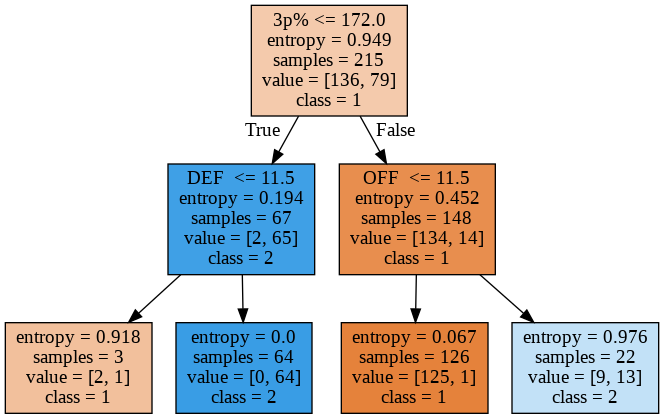

In [106]:
#Profundidad 2
import pydotplus 
from IPython.display import Image

clf2 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=2)
clf2 = clf2.fit(X_trainNBA, y_trainNBA)


dot_data = tree.export_graphviz(clf2, feature_names=X.columns, class_names=['1','2'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

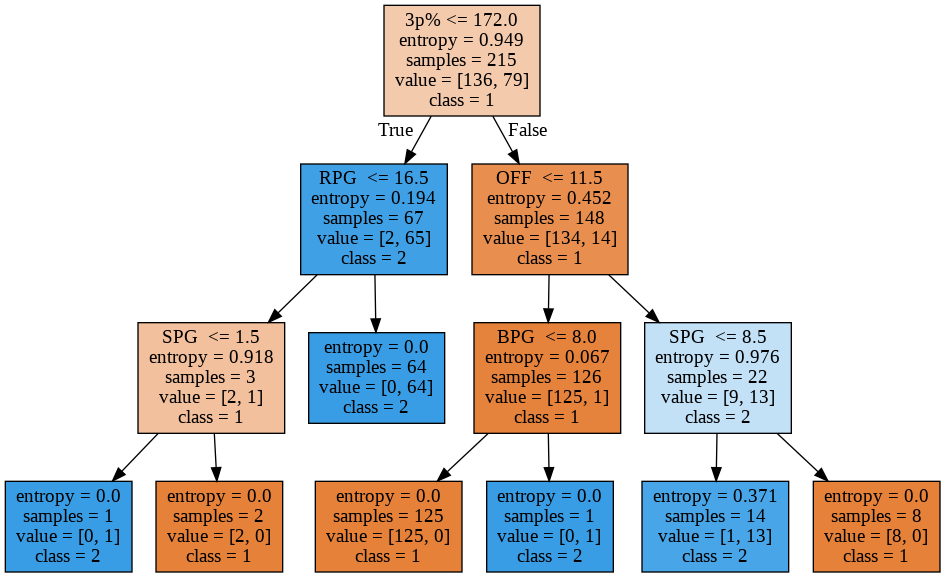

In [107]:
#Profundidad 3
import pydotplus 
from IPython.display import Image

clf3 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf3 = clf3.fit(X_trainNBA, y_trainNBA)


dot_data = tree.export_graphviz(clf3, feature_names=X.columns, class_names=['1','2'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

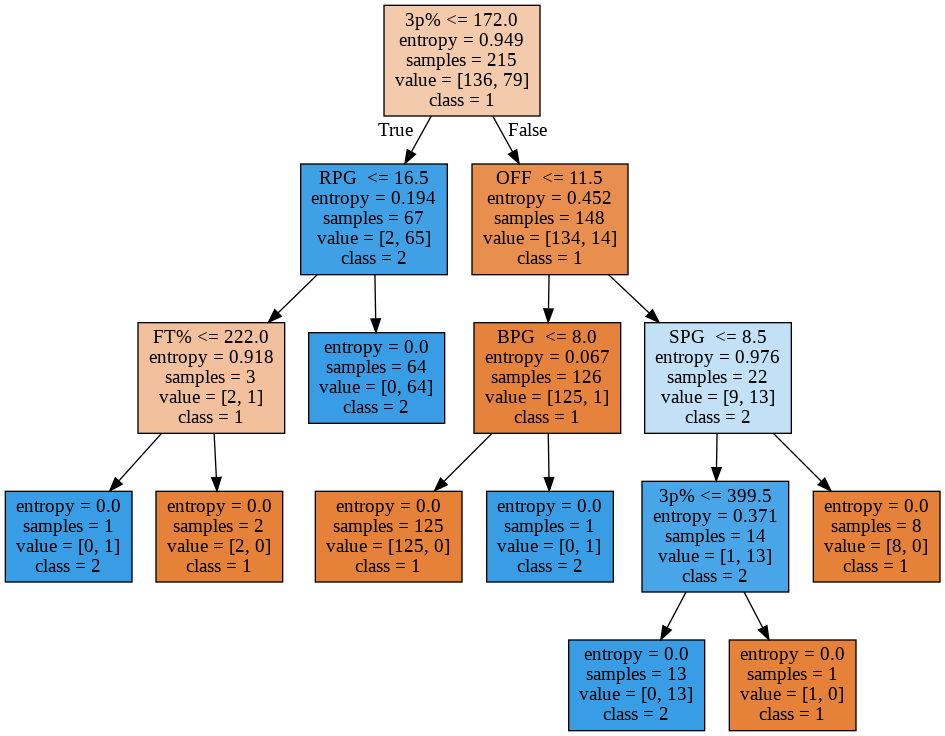

In [108]:
#Profundidad 4
import pydotplus 
from IPython.display import Image

clf4 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=4)
clf4 = clf4.fit(X_trainNBA, y_trainNBA)


dot_data = tree.export_graphviz(clf4, feature_names=X.columns, class_names=['1','2'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

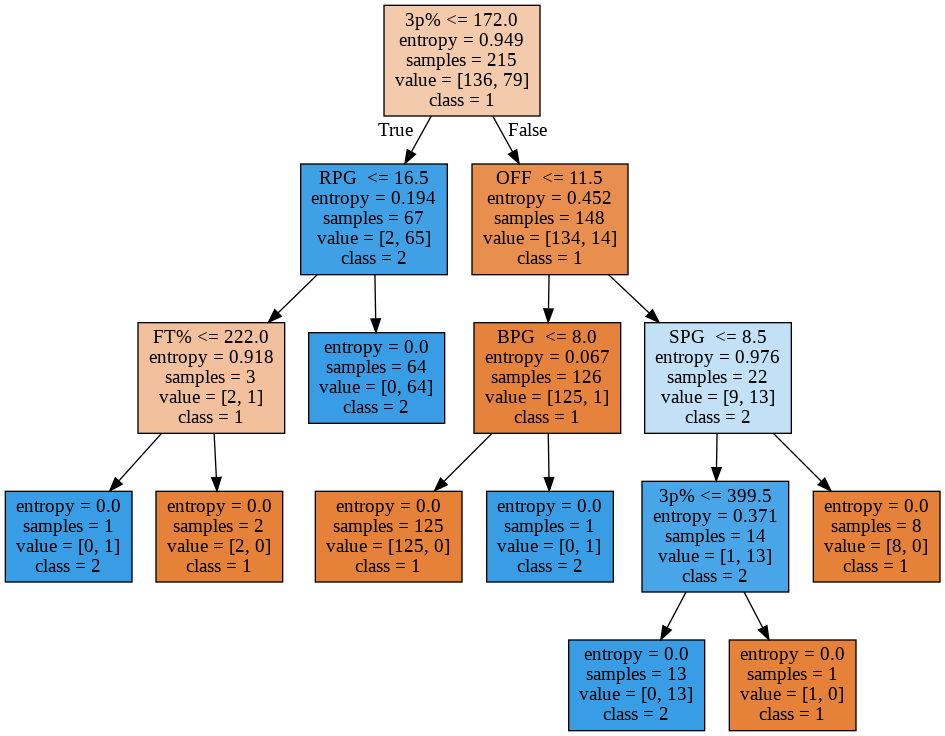

In [109]:
#Profundidad 5
import pydotplus 
from IPython.display import Image

clf5 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)
clf5 = clf5.fit(X_trainNBA, y_trainNBA)


dot_data = tree.export_graphviz(clf5, feature_names=X.columns, class_names=['1','2'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

**d)** De acuerdo con la gráfica, ¿Cuál sería un buen valor de profundidad para el árbol?

**Solo se gráfica hasta la profunidad de 5, de 6 a 10 es exactamente el mismo arbol, por ende, 5 seria el mejor valor de la profundidad del árbol**

**5)**  Cambie la proporción de datos usados para entrenar usando diferentes valores: 10 %, 20 %,...,90 %.

Se imprime la matriz de Confusión con 90 de entrenamiento


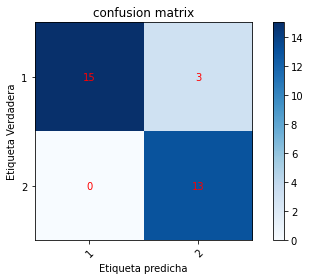

Imprimiendo el análisis de los resultados accuracy, precision, recall, f1: 
[[15  3]
 [ 0 13]]
              precision    recall  f1-score   support

           1       1.00      0.83      0.91        18
           2       0.81      1.00      0.90        13

    accuracy                           0.90        31
   macro avg       0.91      0.92      0.90        31
weighted avg       0.92      0.90      0.90        31



In [118]:
#a) Realizar una partición del conjunto de datos, usando muestreo estratificado: 90 % para entrenamiento y 10 % para test
from sklearn import tree

YNBAnew = data['Class']
XNBAmew = data.drop(['Class'],axis=1)
X_trainNBAnew, X_testNBAnew, y_trainNBAnew, y_testNBAnew = train_test_split(XNBAmew, YNBAnew, test_size=.1,
                                                    random_state=0)

                                                    #b)Entrenar el modelo
clfnew = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clfnew = clfnew.fit(X_trainNBAnew, y_trainNBAnew)


#c)aplicar el modelo
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, classification_report
y_pred_nbanew = clfnew.predict(X_testNBAnew)

#d) Medir el desempeño del modelo calculando Matriz de confusión, Exactitud (Accuracy), Error de clasificación, Precisión (Precision), Índice de Recuperación (Recall), Medida F1
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

#Se Define la función para dibujar la matriz de confusión:
def plot_confusion_matrix(y_true, y_pred_nba, classes,
                          normalize=False, cmap=plt.cm.Blues):

    title = 'confusion matrix'
    cm = confusion_matrix(y_true, y_pred_nba)
    #classes = classes[unique_labels(y_true, y_pred)]
    
    #Matriz de Consufión calculada:
    print("Se imprime la matriz de Confusión con 90 de entrenamiento")

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Etiqueta Verdadera',
           xlabel='Etiqueta predicha')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="red" if cm[i, j] > thresh else "red")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)
y_testNBAnew = list(map(int, y_testNBAnew))
y_pred_nbanew = list(map(int, y_pred_nbanew))

class_names = ['1', '2']
cm = confusion_matrix(y_testNBAnew, y_pred_nbanew)

plot_confusion_matrix(y_testNBAnew, y_pred_nbanew, classes=class_names)
plt.show()

print("Imprimiendo el análisis de los resultados accuracy, precision, recall, f1: ")

print(cm)
# Print the precision and recall, among other metrics
print(classification_report(y_testNBAnew, y_pred_nbanew, digits=2))

Se imprime la matriz de Confusión con 80 de entrenamiento


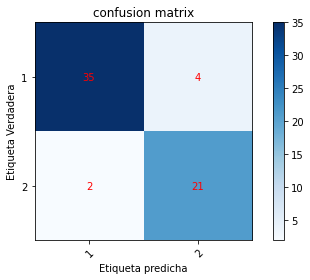

Imprimiendo el análisis de los resultados accuracy, precision, recall, f1: 
[[35  4]
 [ 2 21]]
              precision    recall  f1-score   support

           1       0.95      0.90      0.92        39
           2       0.84      0.91      0.87        23

    accuracy                           0.90        62
   macro avg       0.89      0.91      0.90        62
weighted avg       0.91      0.90      0.90        62



In [122]:
#a) Realizar una partición del conjunto de datos, usando muestreo estratificado: 80 % para entrenamiento y 20 % para test
from sklearn import tree

YNBAnew80 = data['Class']
XNBAmew80 = data.drop(['Class'],axis=1)
X_trainNBAnew80, X_testNBAnew80, y_trainNBAnew80, y_testNBAnew80 = train_test_split(XNBAmew80, YNBAnew80, test_size=.2,
                                                    random_state=0)
#b)Entrenar el modelo
clfnew80 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clfnew80 = clfnew80.fit(X_trainNBAnew80, y_trainNBAnew80)


#c)aplicar el modelo
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, classification_report
y_pred_nbanew80 = clfnew80.predict(X_testNBAnew80)

#d) Medir el desempeño del modelo calculando Matriz de confusión, Exactitud (Accuracy), Error de clasificación, Precisión (Precision), Índice de Recuperación (Recall), Medida F1
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

#Se Define la función para dibujar la matriz de confusión:
def plot_confusion_matrix(y_true, y_pred_nba, classes,
                          normalize=False, cmap=plt.cm.Blues):

    title = 'confusion matrix'
    cm = confusion_matrix(y_true, y_pred_nba)
    #classes = classes[unique_labels(y_true, y_pred)]
    
    #Matriz de Consufión calculada:
    print("Se imprime la matriz de Confusión con 80 de entrenamiento")

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Etiqueta Verdadera',
           xlabel='Etiqueta predicha')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="red" if cm[i, j] > thresh else "red")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)
y_testNBAnew80 = list(map(int, y_testNBAnew80))
y_pred_nbanew80 = list(map(int, y_pred_nbanew80))

class_names = ['1', '2']
cm = confusion_matrix(y_testNBAnew80, y_pred_nbanew80)

plot_confusion_matrix(y_testNBAnew80, y_pred_nbanew80, classes=class_names)
plt.show()

print("Imprimiendo el análisis de los resultados accuracy, precision, recall, f1: ")

print(cm)
# Print the precision and recall, among other metrics
print(classification_report(y_testNBAnew80, y_pred_nbanew80, digits=2))

Se imprime la matriz de Confusión con 60 de entrenamiento


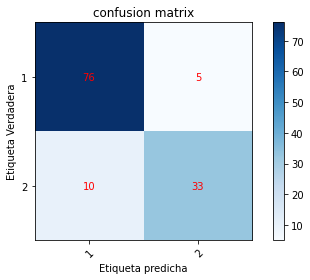

Imprimiendo el análisis de los resultados accuracy, precision, recall, f1: 
[[76  5]
 [10 33]]
              precision    recall  f1-score   support

           1       0.88      0.94      0.91        81
           2       0.87      0.77      0.81        43

    accuracy                           0.88       124
   macro avg       0.88      0.85      0.86       124
weighted avg       0.88      0.88      0.88       124



In [124]:
#a) Realizar una partición del conjunto de datos, usando muestreo estratificado: 60 % para entrenamiento y 40 % para test
from sklearn import tree

YNBAnew60 = data['Class']
XNBAmew60 = data.drop(['Class'],axis=1)
X_trainNBAnew60, X_testNBAnew60, y_trainNBAnew60, y_testNBAnew60 = train_test_split(XNBAmew60, YNBAnew60, test_size=.4,
                                                    random_state=0)
#b)Entrenar el modelo
clfnew60 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clfnew60 = clfnew60.fit(X_trainNBAnew60, y_trainNBAnew60)


#c)aplicar el modelo
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, classification_report
y_pred_nbanew60 = clfnew60.predict(X_testNBAnew60)

#d) Medir el desempeño del modelo calculando Matriz de confusión, Exactitud (Accuracy), Error de clasificación, Precisión (Precision), Índice de Recuperación (Recall), Medida F1
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

#Se Define la función para dibujar la matriz de confusión:
def plot_confusion_matrix(y_true, y_pred_nba, classes,
                          normalize=False, cmap=plt.cm.Blues):

    title = 'confusion matrix'
    cm = confusion_matrix(y_true, y_pred_nba)
    #classes = classes[unique_labels(y_true, y_pred)]
    
    #Matriz de Consufión calculada:
    print("Se imprime la matriz de Confusión con 60 de entrenamiento")

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Etiqueta Verdadera',
           xlabel='Etiqueta predicha')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="red" if cm[i, j] > thresh else "red")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)
y_testNBAnew60 = list(map(int, y_testNBAnew60))
y_pred_nbanew60 = list(map(int, y_pred_nbanew60))

class_names = ['1', '2']
cm = confusion_matrix(y_testNBAnew60, y_pred_nbanew60)

plot_confusion_matrix(y_testNBAnew60, y_pred_nbanew60, classes=class_names)
plt.show()

print("Imprimiendo el análisis de los resultados accuracy, precision, recall, f1: ")

print(cm)
# Print the precision and recall, among other metrics
print(classification_report(y_testNBAnew60, y_pred_nbanew60, digits=2))

Se imprime la matriz de Confusión con 50 de entrenamiento


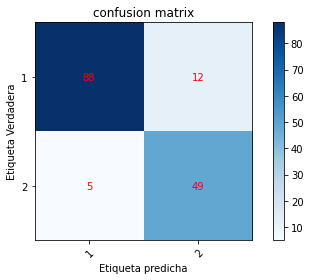

Imprimiendo el análisis de los resultados accuracy, precision, recall, f1: 
[[88 12]
 [ 5 49]]
              precision    recall  f1-score   support

           1       0.95      0.88      0.91       100
           2       0.80      0.91      0.85        54

    accuracy                           0.89       154
   macro avg       0.87      0.89      0.88       154
weighted avg       0.90      0.89      0.89       154



In [126]:
#a) Realizar una partición del conjunto de datos, usando muestreo estratificado: 50 % para entrenamiento y 50 % para test
from sklearn import tree

YNBAnew50 = data['Class']
XNBAmew50 = data.drop(['Class'],axis=1)
X_trainNBAnew50, X_testNBAnew50, y_trainNBAnew50, y_testNBAnew50 = train_test_split(XNBAmew50, YNBAnew50, test_size=.5,
                                                    random_state=0)
#b)Entrenar el modelo
clfnew50 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clfnew50 = clfnew50.fit(X_trainNBAnew50, y_trainNBAnew50)


#c)aplicar el modelo
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, classification_report
y_pred_nbanew50 = clfnew50.predict(X_testNBAnew50)

#d) Medir el desempeño del modelo calculando Matriz de confusión, Exactitud (Accuracy), Error de clasificación, Precisión (Precision), Índice de Recuperación (Recall), Medida F1
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

#Se Define la función para dibujar la matriz de confusión:
def plot_confusion_matrix(y_true, y_pred_nba, classes,
                          normalize=False, cmap=plt.cm.Blues):

    title = 'confusion matrix'
    cm = confusion_matrix(y_true, y_pred_nba)
    #classes = classes[unique_labels(y_true, y_pred)]
    
    #Matriz de Consufión calculada:
    print("Se imprime la matriz de Confusión con 50 de entrenamiento")

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Etiqueta Verdadera',
           xlabel='Etiqueta predicha')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="red" if cm[i, j] > thresh else "red")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)
y_testNBAnew50 = list(map(int, y_testNBAnew50))
y_pred_nbanew50 = list(map(int, y_pred_nbanew50))

class_names = ['1', '2']
cm = confusion_matrix(y_testNBAnew50, y_pred_nbanew50)

plot_confusion_matrix(y_testNBAnew50, y_pred_nbanew50, classes=class_names)
plt.show()

print("Imprimiendo el análisis de los resultados accuracy, precision, recall, f1: ")

print(cm)
# Print the precision and recall, among other metrics
print(classification_report(y_testNBAnew50, y_pred_nbanew50, digits=2))

**c)**Explique el comportamiento

**Con una profundidad de 3 como si realizo al inicio. Se puede observar que el mejor entrenamiento podria llegar a ser 90% para entrenamiento 10% para tester dado que la matriz de cofunsión es la mejor**

#**3**.NEARETS NEIGHBOR

Suponga que los ejemplos categóricos de 5 dimensiones: <br>
estan distribuidos en dos grupos: C1={A,B,E} Y C2={C,D,F}

In [154]:
import pandas as pd
import numpy as np

dknearest = pd.read_csv('knearestU.csv',header='infer', sep=';')
Xknearest  = dknearest.values
Yknearest  = dknearest['Class']

dknearest

,X1,X2,X3,X4,X5,Class
0,1,0,1,1,0,1
1,1,1,0,1,0,1
2,0,0,1,1,0,2
3,0,1,0,1,0,2
4,1,0,1,0,1,1
5,0,1,1,0,0,2


**a)** Use el algoritmo de k-nearest neighbor para encontrar la clasificación de los siguientes
ejemplos:
Y={1,1,0,1,1] usando K = 1
Y={1,1,0,1,1] usando K = 3
Y={0,1,0,0,0] usando K = 1
Y={0,1,0,0,0] usando K = 5


In [155]:
dknearest.shape

(6, 6)

In [156]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [160]:
#Prediccion para  1,1,0,1,1, en la clase 1 y 2 con 1 n_neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(Xknearest, Yknearest)

prediccionClase1 = knn.predict([[1,1,0,1,1,1]])
print("Predicción de la Clase 1  =", prediccionClase1)
prediccionClase2 = knn.predict([[1,1,0,1,1,2]])
print("Predicción de la Clase 2  =",prediccionClase2)

Predicción de la Clase 1  = [1]
Predicción de la Clase 2  = [1]


**Discusión:** el algoritmo predice que el dato (1,1,0,1,1), Despues de calcular la distancia del elemento anteriomente descrito al 1k vecino mas cercano de cada clase, ordena dichas distancias de menor a mayor para ir seleccionando el grupo al que pertenecer. Este grupo será, por tanto, el de mayor frecuencia con menores distancias. Es decir, se puede llegar a encontrar 1 vez en la clase 1, pero tambien se puede clasificar en la clase 2 una vez.

In [161]:
#Prediccion para  1,1,0,1,1, en la clase 1 y 2  con 3 n_neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xknearest, Yknearest)

prediccionClase1 = knn.predict([[1,1,0,1,1,1]])
print("Predicción de la Clase 1  =",prediccionClase1)
prediccionClase2 = knn.predict([[1,1,0,1,1,2]])
print("Predicción de la Clase 2  =",prediccionClase2)

Predicción de la Clase 1  = [1]
Predicción de la Clase 2  = [2]


**Discusión:** el algoritmo predice que el dato (1,1,0,1,1), Despues de calcular la distancia del elemento anteriomente descrito al 3k vecino mas cercano de cada clase, ordena dichas distancias de menor a mayor para ir seleccionando el grupo al que pertenecer. Este grupo será, por tanto, el de mayor frecuencia con menores distancias. Es decir, se puede llegar a encontrar 1 vez en la clase 1, pero tambien se puede clasificar en la clase 2 y encontrarse 2 veces.

In [162]:
#Prediccion para  0,1,0,0,0 en la clase 1 y 2  con 1 n_neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(Xknearest, Yknearest)

prediccionClase1 = knn.predict([[0,1,0,0,0,1]])
print("Predicción de la Clase 1  =",prediccionClase1)
prediccionClase2 = knn.predict([[0,1,0,0,0,2]])
print("Predicción de la Clase 2  =",prediccionClase2)

Predicción de la Clase 1  = [1]
Predicción de la Clase 2  = [2]


**Discusión:** el algoritmo predice que el dato (0,1,0,0,0 ), Despues de calcular la distancia del elemento anteriomente descrito al 1k vecino mas cercano de cada clase, ordena dichas distancias de menor a mayor para ir seleccionando el grupo al que pertenecer. Este grupo será, por tanto, el de mayor frecuencia con menores distancias. Es decir, se puede llegar a encontrar 1 vez en la clase 1, pero tambien se puede clasificar en la clase 2 y encontrarse 2 veces.

In [163]:
#Prediccion para  0,1,0,0,0 en la clase 1 y 2  con 5 n_neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(Xknearest, Yknearest)

prediccionClase1 = knn.predict([[0,1,0,0,0,1]])
print("Predicción de la Clase 1  =",prediccionClase1)
prediccionClase2 = knn.predict([[0,1,0,0,0,2]])
print("Predicción de la Clase 2  =",prediccionClase2)

Predicción de la Clase 1  = [1]
Predicción de la Clase 2  = [2]


**Discusión:** el algoritmo predice que el dato (0,1,0,0,0), Despues de calcular la distancia del elemento anteriomente descrito al 5k vecino mas cercano de cada clase, ordena dichas distancias de menor a mayor para ir seleccionando el grupo al que pertenecer. Este grupo será, por tanto, el de mayor frecuencia con menores distancias. Es decir, se puede llegar a encontrar 1 vez en la clase 1, pero tambien se puede clasificar en la clase 2 y encontrarse 2 veces.

#4)Validación

**a)** Calcular la TPR y FPR 
TPR = TP/TP+FN , FPR =FP/TN+FP

In [254]:
import pandas as pd
import numpy as np

dknearest = pd.read_csv('validacion.csv',header='infer', sep=';')
Xknearest  = dknearest.values
Yknearest  = dknearest['Class']

dknearest

,TP,FP,TN,FN,Class
0,5,5,0,0,1
1,4,5,0,1,0
2,4,4,1,1,1
3,3,4,1,2,0
4,3,3,2,2,0
5,3,2,3,2,0
6,3,1,4,2,1
7,2,1,4,3,0
8,2,0,5,3,1
9,1,0,5,4,1


In [255]:
TPR = (dknearest.TP/(dknearest.TP+dknearest.FN))
TPR

0    1.0
1    0.8
2    0.8
3    0.6
4    0.6
5    0.6
6    0.6
7    0.4
8    0.4
9    0.2
dtype: float64

In [256]:
FPR = (dknearest.FP/(dknearest.TN+dknearest.FP))
FPR

0    1.0
1    1.0
2    0.8
3    0.8
4    0.6
5    0.4
6    0.2
7    0.2
8    0.0
9    0.0
dtype: float64

**b)**  Dibujar la curva Receiver Operating Characteristics (ROC)

In [257]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.250


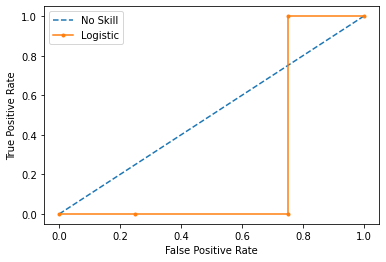

In [258]:
X_trainKn, X_testKn, y_trainKn, y_testKn = train_test_split(Xknearest, Yknearest, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_testKn))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(X_trainKn, y_trainKn)
# predict probabilities
lr_probs = model.predict_proba(X_testKn)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_testKn, ns_probs)
lr_auc = roc_auc_score(y_testKn, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_testKn, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_testKn, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# **5)**COMPARACIÓN DE MODELOS

**2)** Arbol

In [127]:
pd_nba2 = pd.read_csv('nba2.csv')
#Xnba2 = pd_nba2.values
#ynba2 = pd_nba2['Class']

Ynba2 = pd_nba2['Class']
Xnba2 = pd_nba2.drop(['Class'],axis=1)

pd_nba2

,G,GS,MPG,FG%,3p%,FT%,OFF,DEF,RPG,APG,SPG,BPG,TO,PF,PPG,Class
0,362,223,244,466,405,800,6,21,27,15,5,3,8,20,88,1
1,19,0,119,273,298,970,1,11,12,12,4,0,12,14,46,1
2,1148,1140,369,452,400,894,10,32,42,36,12,2,22,23,200,1
3,466,170,198,482,284,745,9,19,28,13,12,4,14,22,78,1
4,38,1,95,381,292,743,3,9,12,3,3,1,5,11,31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,14,0,120,414,0,478,9,19,28,2,5,4,11,16,25,2
304,19,0,58,444,0,417,8,12,21,0,2,8,3,7,15,2
305,43,5,147,507,0,652,15,21,36,3,5,4,5,14,46,2
306,137,29,144,511,0,624,13,21,34,3,3,12,9,24,42,2


In [139]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=20)
clf = clf.fit(Xnba2, Ynba2)
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

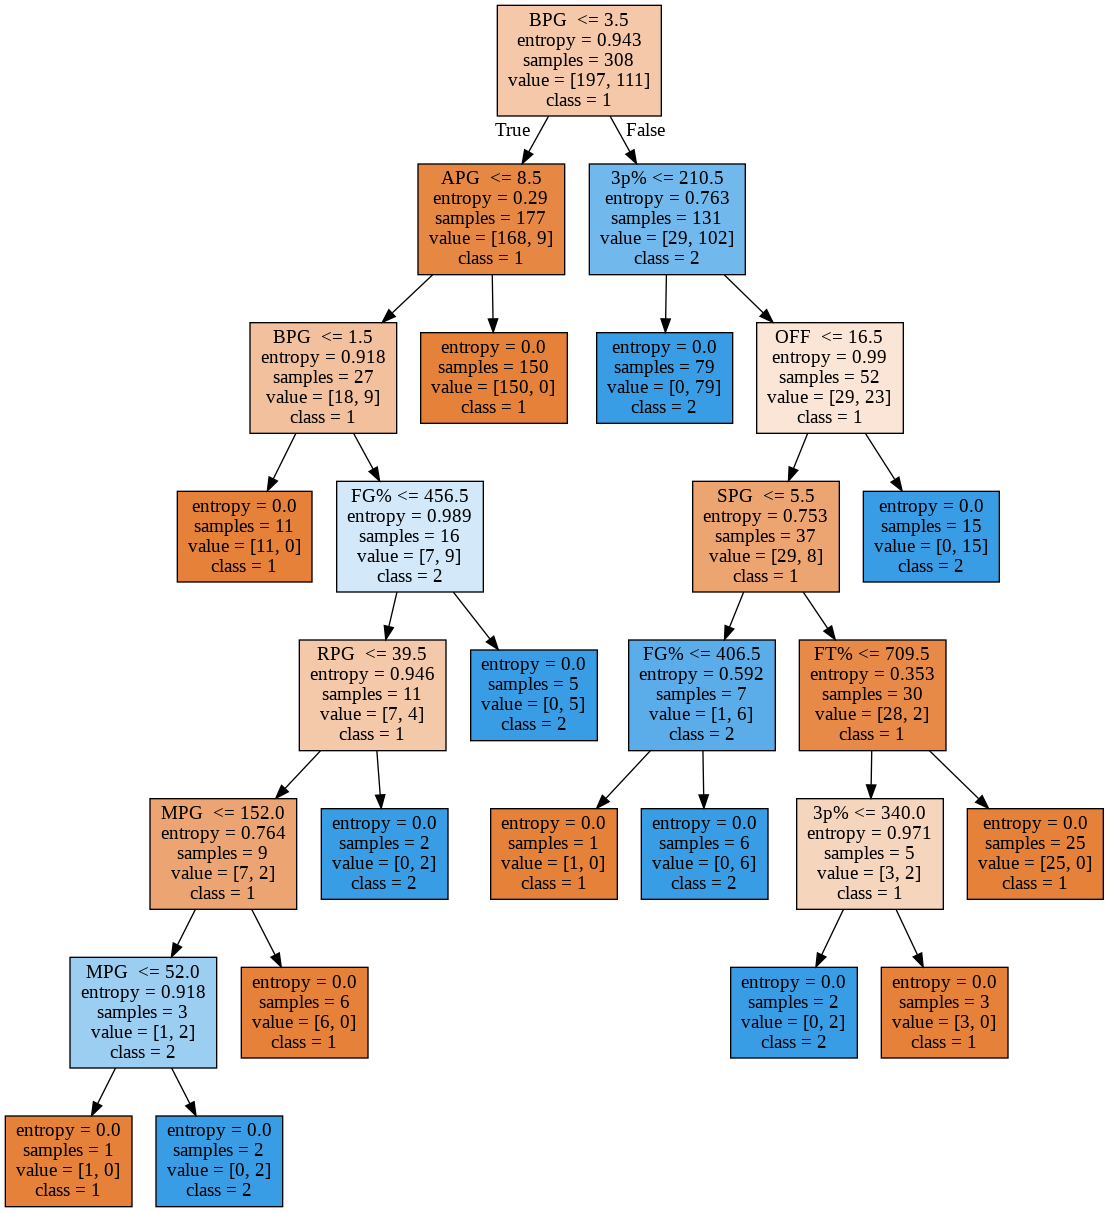

In [140]:
import pydotplus 
from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['1','2'], filled=True,out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

**2.1)** Validación cruzada

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
 
kf = KFold(n_splits=10)
clf = LogisticRegression()
clf.fit(Xnba2, Ynba2)
 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [187]:
score = clf.score(Xnba2,Ynba2)
print("Metrica del modelo", score)
 

Metrica del modelo 1.0


In [188]:
scores = cross_val_score(clf, Xnba2, Ynba2, cv=kf, scoring="accuracy")
print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Metricas cross_validation [0.97 1.   1.   0.97 0.97 0.97 0.97 0.97 0.97 1.  ]
Media de cross_validation 0.9773118279569892


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


**1)** Naïve Bayes

In [191]:
pd_nba2NB = pd.read_csv('nba2.csv')
Xpdnba2 = pd_nba2.values
ypdnba2 = pd_nba2['Class']

pd_nba2NB

,G,GS,MPG,FG%,3p%,FT%,OFF,DEF,RPG,APG,SPG,BPG,TO,PF,PPG,Class
0,362,223,244,466,405,800,6,21,27,15,5,3,8,20,88,1
1,19,0,119,273,298,970,1,11,12,12,4,0,12,14,46,1
2,1148,1140,369,452,400,894,10,32,42,36,12,2,22,23,200,1
3,466,170,198,482,284,745,9,19,28,13,12,4,14,22,78,1
4,38,1,95,381,292,743,3,9,12,3,3,1,5,11,31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,14,0,120,414,0,478,9,19,28,2,5,4,11,16,25,2
304,19,0,58,444,0,417,8,12,21,0,2,8,3,7,15,2
305,43,5,147,507,0,652,15,21,36,3,5,4,5,14,46,2
306,137,29,144,511,0,624,13,21,34,3,3,12,9,24,42,2


In [192]:
# Import LabelEncoder
from sklearn import preprocessing
import numpy as np

from sklearn.model_selection import train_test_split

le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
G_encoded=le.fit_transform(pd_nba2NB['G'])
GS_encoded = le.fit_transform(pd_nba2NB['GS'])
MPG_encoded = le.fit_transform(pd_nba2NB['MPG '])
FG_encoded = le.fit_transform(pd_nba2NB['FG%'])
TRESP_encoded = le.fit_transform(pd_nba2NB['3p%'])
FT_encoded = le.fit_transform(pd_nba2NB['FT%'])
OFF_encoded = le.fit_transform(pd_nba2NB['OFF '])
DEF_encoded = le.fit_transform(pd_nba2NB['DEF '])
RPG_encoded = le.fit_transform(pd_nba2NB['RPG '])
APG_encoded = le.fit_transform(pd_nba2NB['APG '])
SPG_encoded = le.fit_transform(pd_nba2NB['SPG '])
BPG_encoded = le.fit_transform(pd_nba2NB['BPG '])
TO_encoded = le.fit_transform(pd_nba2NB['TO '])
PF_encoded = le.fit_transform(pd_nba2NB['PF '])
PPG_encoded = le.fit_transform(pd_nba2NB['PPG '])
label = le.fit_transform(pd_nba2NB['Class'])

# Combining all dimensions of the dataset
featuresnba2NB = list(zip(G_encoded, GS_encoded, MPG_encoded, FG_encoded,TRESP_encoded,FT_encoded,OFF_encoded,DEF_encoded,RPG_encoded,APG_encoded,
                    SPG_encoded,BPG_encoded,TO_encoded,PF_encoded,PPG_encoded))

print(featuresnba2NB)

#Se parten los datos para usar 70 Entrenamiento y 30 test:
X_train_nba2NB, X_test_nba2NB, y_train_nba2NB, y_test_nba2NB = train_test_split(featuresnba2NB, label,test_size=.3)


[(131, 119, 118, 90, 135, 143, 5, 17, 20, 15, 5, 3, 8, 16, 70), (7, 0, 30, 1, 59, 200, 0, 7, 5, 12, 4, 0, 12, 10, 30), (237, 207, 190, 78, 132, 195, 9, 28, 35, 35, 12, 2, 22, 19, 138), (155, 104, 85, 101, 53, 105, 8, 15, 21, 13, 12, 4, 14, 18, 61), (16, 1, 18, 18, 57, 104, 2, 5, 5, 3, 3, 1, 5, 7, 17), (37, 19, 73, 41, 121, 166, 5, 9, 12, 11, 3, 1, 11, 13, 51), (38, 4, 28, 17, 74, 112, 1, 7, 6, 8, 1, 1, 6, 4, 22), (181, 168, 182, 49, 93, 146, 7, 27, 32, 49, 16, 2, 32, 26, 139), (105, 93, 133, 36, 114, 192, 2, 13, 13, 41, 6, 0, 16, 13, 88), (82, 61, 116, 84, 137, 120, 11, 24, 33, 11, 6, 5, 10, 16, 85), (190, 77, 120, 86, 129, 163, 3, 14, 16, 24, 9, 1, 15, 18, 100), (126, 50, 72, 56, 98, 146, 2, 12, 12, 33, 4, 0, 14, 10, 59), (97, 114, 130, 85, 112, 172, 11, 23, 32, 13, 8, 7, 10, 16, 83), (90, 35, 72, 40, 92, 162, 2, 11, 11, 28, 4, 1, 14, 16, 64), (58, 48, 64, 78, 79, 156, 2, 14, 14, 21, 8, 4, 12, 15, 64), (106, 95, 98, 52, 130, 139, 1, 11, 11, 13, 6, 1, 10, 11, 71), (209, 174, 144, 61, 1

In [193]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import CategoricalNB
# De sklearn.naive_bayes importar GaussianNB, BernoulliNB, MultinomialNB  de acuerdo a los tipos de datos


#Create a Gaussian Classifier
model = CategoricalNB()
model.fit(X_train_nba2NB, y_train_nba2NB)



CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

**1.1)**Validación Cruzada

In [194]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
 
kfnba = KFold(n_splits=10)
clfnba = LogisticRegression()
clfnba.fit(X_train_nba2NB, y_train_nba2NB)
 



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [195]:
score = clfnba.score(X_train_nba2NB,y_train_nba2NB)
print("Metrica del modelo", score)

Metrica del modelo 1.0


In [196]:
scores = cross_val_score(clfnba, X_train_nba2NB, y_train_nba2NB, cv=kf, scoring="accuracy")
print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Metricas cross_validation [0.95 0.95 1.   1.   1.   0.9  0.95 1.   1.   0.95]
Media de cross_validation 0.9718614718614719


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


**3)** ¿Cuál de los dos modelos es mejor?

***Pienso que por poco modelo de Arbol es mucho mejor que el  Naïve Bayes***

# **6)** CLASIFICACIÓN  CON COSTO

In [170]:
pd_costo = pd.read_csv('credit-german.csv',sep=';')
Xpd_costo = pd_costo.values
ypd_costo = pd_costo['class']

pd_costo

,checking_status,disc_duration,credit_history,purpose,credit_amount,savings_status,employment,personal_status,other_parties,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing,radio/tv,1169,no known savings,>=7,male single,none,real estate,67,none,own,two,skilled,one,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,female div/dep/mar,none,real estate,22,none,own,one,skilled,one,none,yes,bad
2,no checking,12,critical/other existing,education,2096,<100,4<=X<7,male single,none,real estate,49,none,own,one,unskilled resident,two,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,male single,guarantor,life insurance,45,none,for free,one,skilled,two,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,male single,none,no known property,53,none,for free,two,skilled,two,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,female div/dep/mar,none,real estate,31,none,own,one,unskilled resident,one,none,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,male div/sep,none,life insurance,40,none,own,one,high qualif/self emp/mgm,one,yes,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,male single,none,car,38,none,own,one,skilled,one,none,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,male single,none,no known property,23,none,for free,one,skilled,one,yes,yes,bad


In [175]:
# Import LabelEncoder
from sklearn import preprocessing
import numpy as np

from sklearn.model_selection import train_test_split

le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
checking_status_encoded=le.fit_transform(pd_costo['checking_status'])
disc_duration_encoded=le.fit_transform(pd_costo['disc_duration'])
credit_history_encoded=le.fit_transform(pd_costo['credit_history'])
purpose_encoded=le.fit_transform(pd_costo['purpose'])
credit_amount_encoded=le.fit_transform(pd_costo['credit_amount'])
savings_status_encoded=le.fit_transform(pd_costo['savings_status'])
employment_encoded=le.fit_transform(pd_costo['employment'])
personal_status_encoded=le.fit_transform(pd_costo['personal_status'])
other_parties_encoded=le.fit_transform(pd_costo['other_parties'])
property_magnitude_encoded=le.fit_transform(pd_costo['property_magnitude'])
age_encoded=le.fit_transform(pd_costo['age'])
other_payment_plans_encoded=le.fit_transform(pd_costo['other_payment_plans'])
housing_encoded=le.fit_transform(pd_costo['housing'])
existing_credits_encoded=le.fit_transform(pd_costo['existing_credits'])
job_encoded=le.fit_transform(pd_costo['job'])
num_dependents_encoded=le.fit_transform(pd_costo['num_dependents'])
own_telephone_encoded=le.fit_transform(pd_costo['own_telephone'])
foreign_worker_encoded=le.fit_transform(pd_costo['foreign_worker'])
label = le.fit_transform(pd_costo['class'])

# Combining all dimensions of the dataset
featuresnbacosto = list(zip(checking_status_encoded,disc_duration_encoded,credit_history_encoded,purpose_encoded,credit_amount_encoded,
                          savings_status_encoded,employment_encoded,personal_status_encoded,other_parties_encoded,property_magnitude_encoded,
                          age_encoded,other_payment_plans_encoded,housing_encoded,existing_credits_encoded,job_encoded,num_dependents_encoded,
                          own_telephone_encoded,foreign_worker_encoded))

print(featuresnbacosto)


X_train_costo, X_test_costo, y_train_costo, y_test_costo = train_test_split(featuresnbacosto, label,test_size=.3)




[(1, 2, 1, 6, 142, 4, 3, 3, 2, 3, 48, 1, 1, 3, 1, 0, 1, 1), (0, 29, 3, 6, 770, 2, 0, 0, 2, 3, 3, 1, 1, 1, 1, 0, 0, 1), (3, 8, 1, 2, 390, 2, 1, 3, 2, 3, 30, 1, 1, 1, 3, 1, 0, 1), (1, 26, 3, 3, 848, 2, 1, 3, 1, 1, 26, 1, 0, 1, 1, 1, 0, 1), (1, 17, 2, 4, 734, 2, 0, 3, 2, 2, 34, 1, 0, 3, 1, 1, 0, 1), (3, 23, 3, 2, 869, 4, 0, 3, 2, 2, 16, 1, 0, 1, 3, 1, 1, 1), (3, 17, 3, 3, 533, 1, 3, 3, 2, 1, 34, 1, 1, 1, 1, 0, 0, 1), (0, 23, 3, 9, 813, 2, 0, 3, 2, 0, 16, 1, 2, 1, 0, 0, 1, 1), (3, 8, 3, 6, 562, 3, 1, 1, 2, 3, 42, 1, 1, 1, 3, 0, 0, 1), (0, 21, 1, 4, 747, 2, 4, 2, 2, 0, 9, 1, 1, 3, 0, 0, 0, 1), (0, 8, 3, 4, 190, 2, 2, 0, 2, 0, 6, 1, 2, 1, 1, 0, 0, 1), (1, 29, 3, 0, 700, 2, 2, 0, 2, 1, 5, 1, 2, 1, 1, 0, 0, 1), (0, 8, 3, 6, 287, 2, 0, 0, 2, 0, 3, 1, 1, 1, 1, 0, 1, 1), (1, 17, 1, 4, 149, 2, 3, 3, 2, 0, 41, 1, 1, 3, 3, 0, 0, 1), (1, 11, 3, 4, 232, 2, 0, 0, 2, 0, 9, 1, 2, 1, 1, 0, 0, 1), (1, 17, 3, 6, 183, 0, 0, 0, 2, 0, 13, 1, 1, 1, 3, 0, 0, 1), (3, 17, 1, 6, 464, 4, 3, 3, 2, 1, 34, 1, 1, 3, 1, 

In [177]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
# De sklearn.naive_bayes importar GaussianNB, BernoulliNB, MultinomialNB  de acuerdo a los tipos de datos


#Create a Gaussian Classifier
modelcosto = CategoricalNB()
modelcosto.fit(X_train_costo, y_train_costo)


 #Validación cruzada
kcosto = KFold(n_splits=5)
clfcosto = LogisticRegression()
clfcosto.fit(X_train_costo, y_train_costo)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [178]:
scorecosto = clfcosto.score(X_train_costo,y_train_costo)
print("Metrica del modelo", scorecosto)

Metrica del modelo 0.7242857142857143


In [182]:
scorescosto = cross_val_score(clfcosto, X_train_costo, y_train_costo, cv=kf, scoring="accuracy")
print("Metricas cross_validation", scorescosto)
print("Media de cross_validation", scorescosto.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Metricas cross_validation [0.67 0.72 0.76 0.7  0.64]
Media de cross_validation 0.6985714285714285


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Se imprime la matriz de Confusión


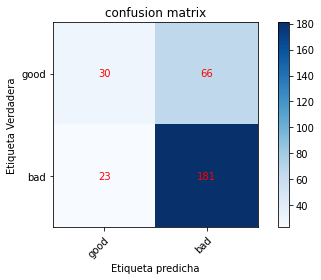

Imprimiendo el análisis de los resultados accuracy, precision, recall, f1: 
[[ 30  66]
 [ 23 181]]
              precision    recall  f1-score   support

           0       0.57      0.31      0.40        96
           1       0.73      0.89      0.80       204

    accuracy                           0.70       300
   macro avg       0.65      0.60      0.60       300
weighted avg       0.68      0.70      0.67       300



In [184]:
#c)aplicar el modelo
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, classification_report
y_pred_costo = clfcosto.predict(X_test_costo)

#d) Medir el desempeño del modelo calculando Matriz de confusión, Exactitud (Accuracy), Error de clasificación, Precisión (Precision), Índice de Recuperación (Recall), Medida F1
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

#Se Define la función para dibujar la matriz de confusión:
def plot_confusion_matrix(y_true, y_pred_nba, classes,
                          normalize=False, cmap=plt.cm.Blues):

    title = 'confusion matrix'
    cm = confusion_matrix(y_true, y_pred_nba)
    #classes = classes[unique_labels(y_true, y_pred)]
    
    #Matriz de Consufión calculada:
    print("Se imprime la matriz de Confusión")

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Etiqueta Verdadera',
           xlabel='Etiqueta predicha')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="red" if cm[i, j] > thresh else "red")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)
y_test_costo = list(map(int, y_test_costo))
y_pred_costo = list(map(int, y_pred_costo))

class_names = ['good', 'bad']
cm = confusion_matrix(y_test_costo, y_pred_costo)

plot_confusion_matrix(y_test_costo, y_pred_costo, classes=class_names)
plt.show()

print("Imprimiendo el análisis de los resultados accuracy, precision, recall, f1: ")

print(cm)
# Print the precision and recall, among other metrics
print(classification_report(y_test_costo, y_pred_costo, digits=2))

**Tiene 66 (FP) falsos positivos  y 23 (FN) falsos negativos**

#**7)** ENSAMBLADORES

In [164]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random

%matplotlib inline

N = 1500

mean1 = [6, 14]
mean2 = [10, 6]
mean3 = [14, 14]
cov = [[3.5, 0], [0, 3.5]]  # diagonal covariance

np.random.seed(50)
X = np.random.multivariate_normal(mean1, cov, int(N/6))
X = np.concatenate((X, np.random.multivariate_normal(mean2, cov, int(N/6))))
X = np.concatenate((X, np.random.multivariate_normal(mean3, cov, int(N/6))))
X = np.concatenate((X, 20*np.random.rand(int(N/2),2)))
Y = np.concatenate((np.ones(int(N/2)),np.zeros(int(N/2))))

#plt.plot(X[:int(N/2),0],X[:int(N/2),1],'r+',X[int(N/2):,0],X[int(N/2):,1],'k.',ms=4)

In [165]:
#########################################
# Training and Test set creation
#########################################

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1)

from sklearn import tree
from sklearn.metrics import accuracy_score

#########################################
# Model fitting and evaluation
#########################################

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
#########################################
# Plot of training and test accuracies
#########################################
    
#plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
#plt.legend(['Training Accuracy','Test Accuracy'])
#plt.xlabel('Max depth')
#plt.ylabel('Accuracy')

[Text(0, 0, 'Random Forest'), Text(0, 0, 'Bagging'), Text(0, 0, 'AdaBoost')]

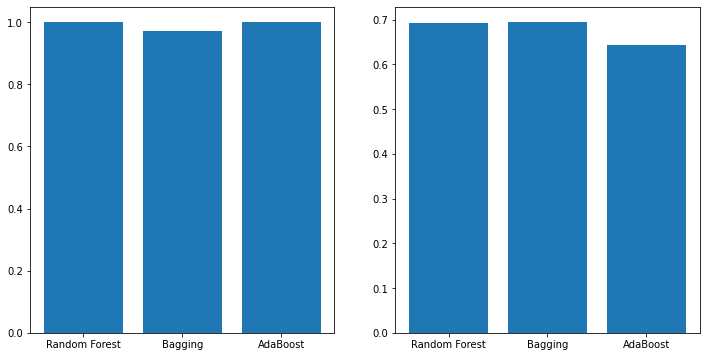

In [169]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier

numBaseClassifiers = 500
maxdepth = 10
trainAcc = []
testAcc = []

clf = ensemble.RandomForestClassifier(n_estimators=numBaseClassifiers)
clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))

clf = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))

clf = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))

methods = ['Random Forest', 'Bagging', 'AdaBoost']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.bar([1.5,2.5,3.5], trainAcc)
ax1.set_xticks([1.5,2.5,3.5])
ax1.set_xticklabels(methods)
ax2.bar([1.5,2.5,3.5], testAcc)
ax2.set_xticks([1.5,2.5,3.5])
ax2.set_xticklabels(methods)





1.   Random Forest->Su principal ventaja es que obtiene un mejor rendimiento de generalización para un rendimiento durante entrenamiento similar. Pienso que es el mejor en el entrenamiento
2.   Bagging Probabilidad de que se seleccione una instancia de entrenamiento en
una muestra de 0.632

